In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

Update end date below to the previous day's date

In [9]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'12/26/2021'

In [59]:
x = pd.date_range(start='3/25/2020', end=yesterday)
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

https://github.com/CSSEGISandData/COVID-19

df_jhu_total_dict= {}
for y in range(len(date_list)):
    !sleep 3
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_total_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_total_dict[date_list[y]]['dt_date'] = dt_date_list[y]
    print(date_list[y])

In [29]:
with open(yesterday.strftime('%d_%b_%Y') + r'_JHU_total_data.pkl', 'wb') as ofile:
    pickle.dump(df_jhu_total_dict, ofile)

In [30]:
!ls -alt *.pkl


-rw-r--r-- 1 ldhagen ldhagen 320650145 Dec 27 14:34 26_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320166007 Dec 26 18:29 25_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320166007 Dec 26 18:28 25_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6051249 Dec 24 07:30 23_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6041507 Dec 23 13:05 22_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6031782 Dec 22 14:34 21_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6012332 Dec 20 13:42 19_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   5992873 Dec 18 16:16 17_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   5963681 Dec 15 11:33 14_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   5953956 Dec 14 15:11 13_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   5905305 Dec  9 15:58 08_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   5895580 Dec  8 16:06 07_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   5856654 Dec  4 14:57 03_Dec_2021_

In [6]:
with open('25_Dec_2021_JHU_total_data.pkl', 'rb') as ifile:
    df_jhu_total_dict = pickle.load(ifile)

In [28]:
len(df_jhu_total_dict)

705

In [20]:
df_jhu_additional_dict = {}
url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-26-2021.csv'
df_jhu_additional_dict['12-26-2021'] = pd.read_csv(url_value,header=0)

In [12]:
dt_date_list[-1:]

704   2021-12-26
dtype: datetime64[ns]

In [21]:
df_jhu_total_dict['12-26-2021'] = pd.read_csv(url_value,header=0)

In [58]:
df_jhu_total_dict['03-25-2020']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,dt_date
0,45001.0,Abbeville,South Carolina,US,2020-03-25 23:33:19,34.223334,-82.461707,3,0,0,3,"Abbeville, South Carolina, US",2020-03-25
1,22001.0,Acadia,Louisiana,US,2020-03-25 23:33:19,30.295065,-92.414197,2,0,0,2,"Acadia, Louisiana, US",2020-03-25
2,51001.0,Accomack,Virginia,US,2020-03-25 23:33:19,37.767072,-75.632346,2,0,0,2,"Accomack, Virginia, US",2020-03-25
3,16001.0,Ada,Idaho,US,2020-03-25 23:33:19,43.452658,-116.241552,24,0,0,24,"Ada, Idaho, US",2020-03-25
4,19001.0,Adair,Iowa,US,2020-03-25 23:33:19,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US",2020-03-25
5,21001.0,Adair,Kentucky,US,2020-03-25 23:33:19,37.104598,-85.281297,0,0,0,0,"Adair, Kentucky, US",2020-03-25
6,29001.0,Adair,Missouri,US,2020-03-25 23:33:19,40.190586,-92.600782,1,0,0,1,"Adair, Missouri, US",2020-03-25
7,40001.0,Adair,Oklahoma,US,2020-03-25 23:33:19,35.884942,-94.658593,2,0,0,2,"Adair, Oklahoma, US",2020-03-25
8,8001.0,Adams,Colorado,US,2020-03-25 23:33:19,39.874321,-104.336258,27,0,0,27,"Adams, Colorado, US",2020-03-25
9,16003.0,Adams,Idaho,US,2020-03-25 23:33:19,44.893336,-116.454525,0,0,0,0,"Adams, Idaho, US",2020-03-25


In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
total_key_list = list(df_jhu_total_dict.keys())
part_key_list = total_key_list[300::]

In [78]:
def process_combined_key_confirmed(passed_combined_key):
    print(passed_combined_key)
    aaa = df_jhu_total_dict[date_list[0]].loc[df_jhu_total_dict[date_list[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in date_list[1:]:
        aaa = aaa.append(df_jhu_total_dict[d_value].loc[df_jhu_total_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

comkey = 'Bexar, Texas, US'
aaa = df_jhu_total_dict[date_list[-10]].loc[df_jhu_total_dict[date_list[-10]].Combined_Key == comkey]

In [71]:
 aaa = df_jhu_total_dict[date_list[0]].loc[df_jhu_total_dict[date_list[0]].Combined_Key =='Bexar, Texas, US']
                                    

In [62]:
date_list[0]

'03-25-2020'

In [79]:
xxx = process_combined_key_confirmed('Bexar, Texas, US')

Bexar, Texas, US


In [82]:
xxx[2]

,Confirmed
dt_date,
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,NaN
2020-03-30,NaN
2020-03-31,NaN
2020-04-01,NaN
2020-04-02,19.714286


In [83]:
def chart_daily_confirmed(passed_df, passed_state_name, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_state_name + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Active Cases'])
    fig.savefig('JHUDaily '+ passed_state_name + ' New.png')
plt.close()

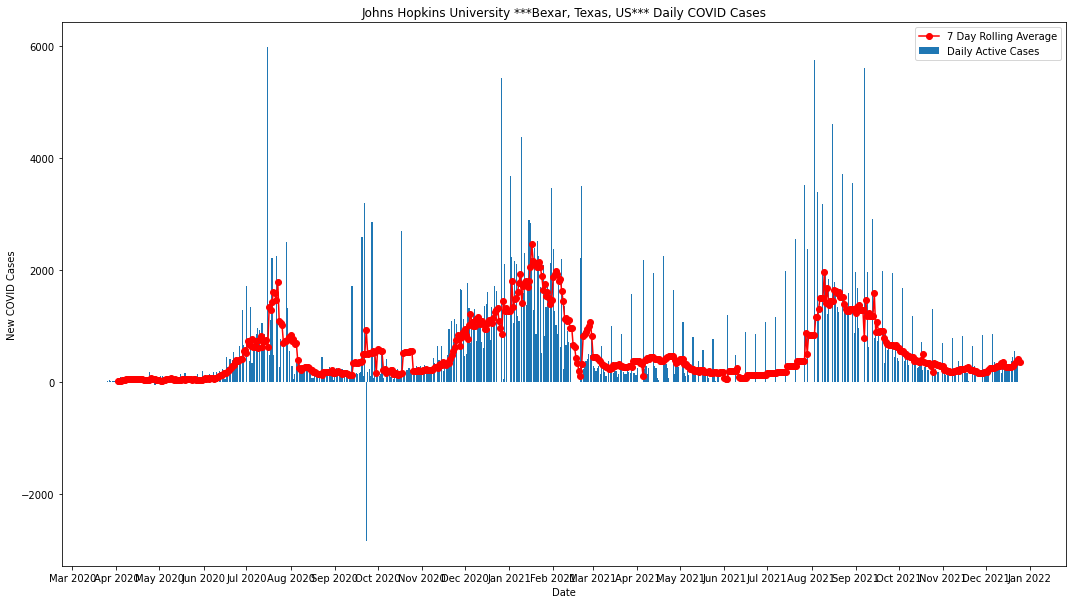

In [86]:
chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [31]:
total_key_list

['01-22-2020',
 '01-23-2020',
 '01-24-2020',
 '01-25-2020',
 '01-26-2020',
 '01-27-2020',
 '01-28-2020',
 '01-29-2020',
 '01-30-2020',
 '01-31-2020',
 '02-01-2020',
 '02-02-2020',
 '02-03-2020',
 '02-04-2020',
 '02-05-2020',
 '02-06-2020',
 '02-07-2020',
 '02-08-2020',
 '02-09-2020',
 '02-10-2020',
 '02-11-2020',
 '02-12-2020',
 '02-13-2020',
 '02-14-2020',
 '02-15-2020',
 '02-16-2020',
 '02-17-2020',
 '02-18-2020',
 '02-19-2020',
 '02-20-2020',
 '02-21-2020',
 '02-22-2020',
 '02-23-2020',
 '02-24-2020',
 '02-25-2020',
 '02-26-2020',
 '02-27-2020',
 '02-28-2020',
 '02-29-2020',
 '03-01-2020',
 '03-02-2020',
 '03-03-2020',
 '03-04-2020',
 '03-05-2020',
 '03-06-2020',
 '03-07-2020',
 '03-08-2020',
 '03-09-2020',
 '03-10-2020',
 '03-11-2020',
 '03-12-2020',
 '03-13-2020',
 '03-14-2020',
 '03-15-2020',
 '03-16-2020',
 '03-17-2020',
 '03-18-2020',
 '03-19-2020',
 '03-20-2020',
 '03-21-2020',
 '03-22-2020',
 '03-23-2020',
 '03-24-2020',
 '03-25-2020',
 '03-26-2020',
 '03-27-2020',
 '03-28-20

In [32]:
type(date_list[-1])

str

In [33]:
type(total_key_list[-1])

str